In [132]:
import torch 
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import random
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [133]:
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data['label'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 数据探索

In [134]:
null_data = data.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame({"缺失值占比":null_data})
missing_data

In [135]:
data['label'].value_counts().plot(kind='bar')
plt.title("标签的各类别占比")
plt.xlabel("标签")
plt.ylabel("数量")

In [136]:
# 查看变量之间的相关性
num_cols = iris.feature_names
plt.figure(figsize=(18,6),dpi=600)
sns.pairplot(data[num_cols],  kind="reg", diag_kind = 'kde')

从这里可以看出有些变量之间的相关性强度很高，有些分布不是很均匀；是否要将其去掉一些变量或者进行正态化分布

In [137]:
# 看一下数据的分布以及离群点
def show_info():
    for i in iris.feature_names:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
        sns.boxplot(x = i, data = data, orient = 'v', ax = ax1)
        ax1.set_xlabel(f"prople {i}", fontsize=15)
        ax1.set_ylabel(i, fontsize=15)
        ax1.set_title(f'{i} 分布', fontsize=15)
        ax1.tick_params(labelsize=15)

        sns.distplot(data[i], ax = ax2)
        sns.despine(ax = ax2)
        ax2.set_xlabel(i, fontsize=15)
        ax2.set_ylabel('频数', fontsize=15)
        ax2.set_title('带有高斯核密度曲线的频数分布', fontsize=15)
        ax2.tick_params(labelsize=15)

        plt.subplots_adjust(wspace=0.5)
        plt.tight_layout() 
show_info()

第二个变量存在一些异常值、


In [138]:
sns.heatmap(data.corr(),
          annot=True,
          linewidths=.4,
          center=0,
          cbar=False,
          cmap="PiYG")

In [139]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 数据预处理

In [140]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [141]:
temp_data = data.copy()
# from sklearn.preprocessing import StandardScaler,RobustScaler
# rob = RobustScaler()
# # temp_data[['sepal width (cm)']] = rob.fit_transform(temp_data[['sepal width (cm)']])
# temp_data[['sepal length (cm)','petal length (cm)','sepal width (cm)']] = StandardScaler().fit_transform(temp_data[['sepal length (cm)','petal length (cm)','sepal width (cm)']])
# temp_data

In [142]:

X = temp_data[[i for i in temp_data.columns if i!='label']]
y = temp_data['label']
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,shuffle=True,random_state=42)

In [144]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## 建模

### 1.定义softmax操作

softmax:

$$ \hat y_j = \frac{exp(o_j)}{\sum_{k}exp(o_k)} $$

In [145]:
def softmax(scores):
    # 计算总和
    sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True) # 分母
    softmax = np.exp(scores) / sum_exp                      # 分子
    return softmax
softmax(np.array([[1,2,3],
                  [4,5,6]]))

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

### 2.定义损失函数

损失函数在这里选择了交叉熵：

对于单个样本而言，其交叉熵为：
$$
l(y,\hat y)  = -\sum_{i=1}^q y_ilog\hat y_i
$$
q是种类，$y_i$是真实的情况，$\hat y_i$是经过softmax输出的情况

考虑到所有样本，在这里选择的损失函数就是

$$
    -\frac{1}{m} \sum_{k=1}^m \sum_{i=1}^q y_{i}^k log \hat y_i^k
$$

与上课所讲其实是一样的:

<img src = "https://xingqiu-tuchuang-1256524210.cos.ap-shanghai.myqcloud.com/9147/Snipaste_2022-11-04_19-25-07.png">

下面的代码是如何用到这个损失函数的呢？

首先会对标签做one_hot映射，即真实类别就是1，其他类别都是0。见下面的one_hot函数

在这里$y_i$就是one_hot映射后数据(一个向量)，$\hat y_i$就是softmax操作之后求得的预测概率(一个向量)，即每一个样本属于每个类别的概率。
即下面这个操作:

```loss = -(1.0 / n_samples) * np.sum(y_one_hot * np.log(probs))```

注意在这里使用的是所有样本数据，因此要除以样本数量


In [146]:
def one_hot(label_arr, n_samples, n_classes):
    one_hot = np.zeros((n_samples, n_classes))
    one_hot[np.arange(n_samples), label_arr.T] = 1
    return one_hot

one_hot(np.array([1,1,1,0,1,2]),6,3)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3.模型



$$O = Wx+b$$
$$\hat y = softmax(O)$$

即：
```
        scores = np.dot(data_arr, weights.T)   # 没用偏置b
        # 计算 softmax 的值
        probs = softmax(scores)```

### 4.梯度下降

如何进行梯度下降呢？

对损失函数进行求导，再进行参数跟新。

In [147]:
def predict(test_dataset, label_arr, weights):
    scores = np.dot(test_dataset, weights.T)
    probs = softmax(scores)
    return np.argmax(probs, axis=1).reshape((-1, 1))

def train(data_arr, label_arr, n_class, iters=2000, alpha=0.1, lam=0.01):
    n_samples, n_features = data_arr.shape
    n_classes = n_class
    # 随机初始化权重矩阵
    weights = np.random.rand(n_class, n_features)
    # 定义损失结果
    all_loss = list()
    # 计算 one-hot 矩阵
    y_one_hot = one_hot(label_arr, n_samples, n_classes)
    for i in range(iters):
        # 计算 m * k 的分数矩阵
        scores = np.dot(data_arr, weights.T)
        # 计算 softmax 的值
        probs = softmax(scores)
        # 计算损失函数值
        loss = -(1.0 / n_samples) * np.sum(y_one_hot * np.log(probs))
        all_loss.append(loss)
        # 求解梯度
        dw = (
            -(1.0 / n_samples) * np.dot((y_one_hot - probs).T, data_arr) + lam * weights
        )
        dw[:, 0] = dw[:, 0] - lam * weights[:, 0]
        # 更新权重矩阵
        weights = weights - alpha * dw
    return weights, all_loss


In [148]:
train_data_arr, train_label_arr = X_train, y_train
# data_arr = np.array(data_arr)
train_label_arr = np.array(train_label_arr).reshape((-1, 1))
weights, all_loss = train(train_data_arr, train_label_arr, n_class=3)
y_predict = predict(train_data_arr, train_label_arr, weights)

accuray = np.sum(y_predict == train_label_arr) / len(train_label_arr)
print("训练集准确率", accuray)


# 计算预测的准确率
test_data_arr, test_label_arr = X_test, y_test
# test_data_arr = np.array(test_data_arr)
test_label_arr = np.array(test_label_arr).reshape((-1, 1))
y_predict = predict(test_data_arr, test_label_arr, weights)
accuray = np.sum(y_predict == test_label_arr) / len(test_label_arr)
print("测试集准确率", accuray)

训练集准确率 0.9714285714285714
测试集准确率 1.0


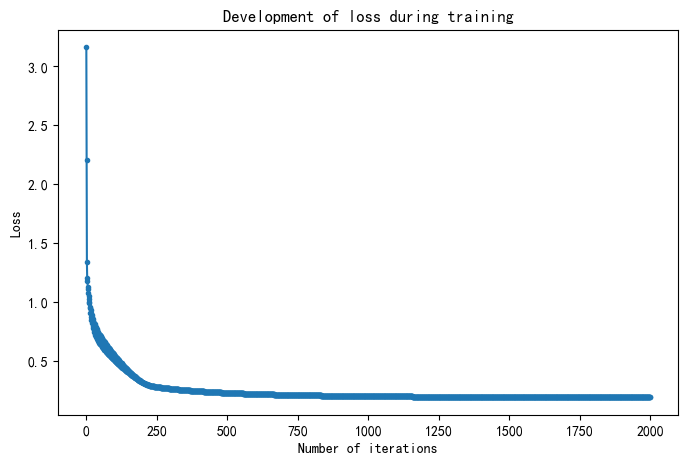

In [149]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(2000), all_loss, marker=".")
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

## Pytorch 建模

### 加载数据集

In [150]:
## 加载数据集
class Dataset(torch.utils.data.Dataset):
    def __init__(self,X_train,y_train) -> None:
        self.data = torch.tensor(X_train.values,dtype=torch.float32)    # 要用float32
        self.label = torch.tensor(y_train.values,dtype=torch.int64)     # 要用int64
    
    def __len__(self):              # 运算符重载
        return len(self.data)
    def __getitem__(self,i):        # 运算符重载
        return self.data[i],self.label[i]

def load_data(X,y,batch_size):
    dataloader = torch.utils.data.DataLoader(dataset=Dataset(X,y), batch_size=batch_size, shuffle=True)
    return dataloader
batch_size = 12
train_iter = load_data(X_train,y_train,batch_size)
train_iter

In [151]:
# 定义softmax操作
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1,keepdim=True) #输出是一个向量，代表了每种类别的概率
    return X_exp / partition                # 广播机制，每一行除以该行的和

# 定义损失函数
def cross_entropy(y_hat,y):                 # 交叉熵
    return -torch.log(y_hat[range(len(y_hat)),y])

# 初始化模型参数
num_inputs = 4  # 4个特征
num_outputs = 3  # 输出10种类别

W = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)       # 权重矩阵
b = torch.zeros(num_outputs,requires_grad=True)                                 # 偏置矩阵

# 定义模型
def net(X):
    return softmax(torch.matmul(X.reshape(-1,W.shape[0]),W)+b)

# 定义分类精度
from sklearn.metrics import accuracy_score as acc

# 定义梯度下降
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size       # 在定义损失函数的时候没有除以批量大小，在这里进行
            param.grad.zero_()      # 求导会累积梯度，每次跟新完参数要设置为0       

In [152]:
def train_epoch(net, train_iter, loss, updater):  
    # 训练损失总和、训练准确度总和、样本数
    acc_array = []
    loss_value = 0 # 存放所有数据的损失值
    loss_count = 0   # 存放数据的个数
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)                                  # 网络
        l = loss(y_hat, y)                              # 损失函数，这里使用自定义的损失函数
        # 使用定制的优化器和损失函数
        l.sum().backward()                          # 反向传播，对每个分量求梯度,自己写的优化器是除以了batch_size
        updater(X.shape[0])                         # 更新参数
        loss_value += l.sum()
        loss_count += y.numel()
        acc_array.append(acc(y.detach(),y_hat.detach().argmax(dim=1)))
    
    return loss_value/loss_count,np.sum(acc_array)/len(acc_array)  # 除以样本数，返回损失值和训练集的精确度

def train(net, train_iter,loss, num_epochs, updater):
    final_loss = []
    train_acc_array = []
    test_acc_array = []
    
    for epoch in range(num_epochs):
        loss_,acc_score = train_epoch(net, train_iter, loss, updater)
        test_acc = acc(y_test, net(torch.tensor(X_test.values,dtype=torch.float32)).detach().argmax(dim=1))     # 直接进行评价，不在进行小批量评价
        final_loss.append(loss_),train_acc_array.append(acc_score),test_acc_array.append(test_acc)
        if epoch %100 ==0:
            print(f"第{epoch}轮，训练集的损失值:{loss_},训练集的精确度是:{acc_score},测试集的精确度是:{test_acc}")
    return final_loss,train_acc_array,test_acc_array
def updater(batch_size):
    return sgd([W, b], 0.001, batch_size)      # 自定义的优化器,自定义的优化器是实现了除以batch_size

final_loss,train_acc_array,test_acc_array = train(net,train_iter,cross_entropy,9000,updater)

第0轮，训练集的损失值:1.1100870370864868,训练集的精确度是:0.2623456790123457,测试集的精确度是:0.28888888888888886
第100轮，训练集的损失值:0.7557684779167175,训练集的精确度是:0.654320987654321,测试集的精确度是:0.7111111111111111
第200轮，训练集的损失值:0.6269118785858154,训练集的精确度是:0.8024691358024693,测试集的精确度是:0.7777777777777778
第300轮，训练集的损失值:0.5596166253089905,训练集的精确度是:0.8117283950617283,测试集的精确度是:0.8666666666666667
第400轮，训练集的损失值:0.5154551267623901,训练集的精确度是:0.8858024691358024,测试集的精确度是:0.8666666666666667
第500轮，训练集的损失值:0.48346710205078125,训练集的精确度是:0.904320987654321,测试集的精确度是:0.8888888888888888
第600轮，训练集的损失值:0.45818278193473816,训练集的精确度是:0.9104938271604939,测试集的精确度是:0.9777777777777777
第700轮，训练集的损失值:0.43672364950180054,训练集的精确度是:0.9290123456790123,测试集的精确度是:0.9777777777777777
第800轮，训练集的损失值:0.4186769425868988,训练集的精确度是:0.9444444444444444,测试集的精确度是:1.0
第900轮，训练集的损失值:0.4032385051250458,训练集的精确度是:0.9537037037037036,测试集的精确度是:1.0
第1000轮，训练集的损失值:0.3886195123195648,训练集的精确度是:0.9537037037037037,测试集的精确度是:1.0
第1100轮，训练集的损失值:0.37600934505462646,训练集的精确度是:0.9537037037037036,测试

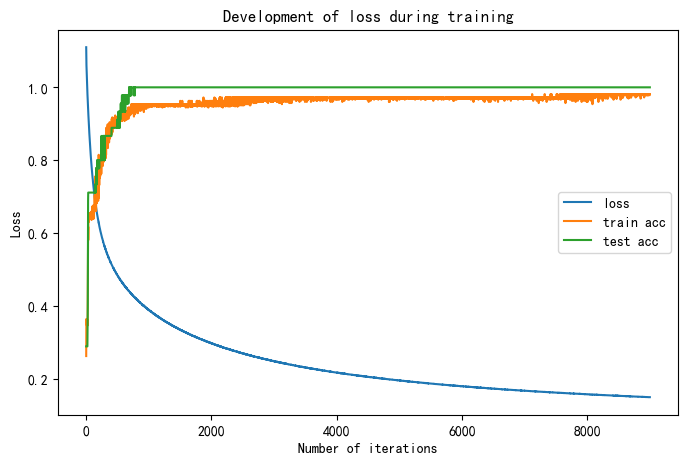

In [153]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(final_loss)), [i.detach() for i in final_loss],'-',label = 'loss')
plt.plot(np.arange(len(final_loss)), train_acc_array, '-',label = 'train acc')
plt.plot(np.arange(len(final_loss)), test_acc_array, '-',label = 'test acc')
plt.legend()
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [154]:
print(f"训练集准确度:{acc(net(torch.tensor(X_train.values,dtype=torch.float32)).detach().argmax(dim=1),y_train)}")
print(f"训练集准确度:{acc(net(torch.tensor(X_test.values,dtype=torch.float32)).detach().argmax(dim=1),y_test)}")

训练集准确度:0.9809523809523809
训练集准确度:1.0
